In [7]:
import pandas as pd
import numpy as np


In [8]:
# Load low intensity short duration test data

test_list = ['low', 'medium', 'high']

# Dictionary to hold all the DataFrames, organized by test intensity
data_frames = {}

for test_intensity in test_list:
    base_path = './locust_test_result/{}-intensity-'.format(test_intensity)
    
    # Construct file paths dynamically
    paths = {
        'short': base_path + 'short_stats_history.csv',
        'short_low_spawn_rate': base_path + 'short-low-spawn-rate_stats_history.csv',
        'short_high_spawn_rate': base_path + 'short-high-spawn-rate_stats_history.csv',
        'long_5mins': base_path + 'long-5mins_stats_history.csv',
        'long_30mins': base_path + 'long-30mins_stats_history.csv',
        'long_60mins': base_path + 'long-60mins_stats_history.csv',
    }
    
    # Load dataframes and store them in the dictionary
    data_frames[test_intensity] = {key: pd.read_csv(path) for key, path in paths.items()}


low_short_df = data_frames['low']['short']

high_intensity_long_60mins_df = data_frames['high']['long_60mins']
# low_short_df.describe

low_short_df.columns

Index(['Timestamp', 'User Count', 'Type', 'Name', 'Requests/s', 'Failures/s',
       '50%', '66%', '75%', '80%', '90%', '95%', '98%', '99%', '99.9%',
       '99.99%', '100%', 'Total Request Count', 'Total Failure Count',
       'Total Median Response Time', 'Total Average Response Time',
       'Total Min Response Time', 'Total Max Response Time',
       'Total Average Content Size'],
      dtype='object')

-------------LowIntensity--------------------------


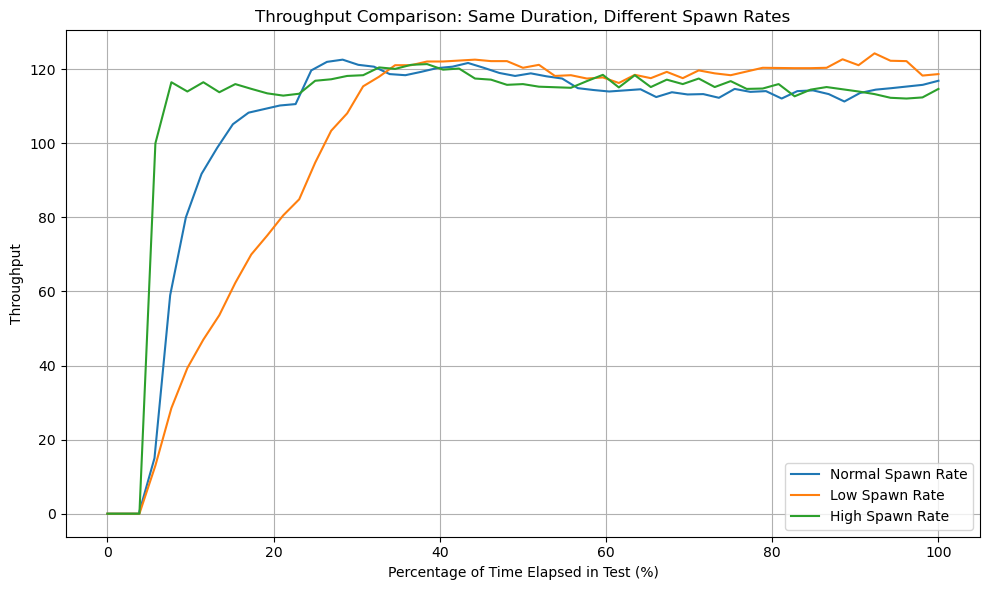

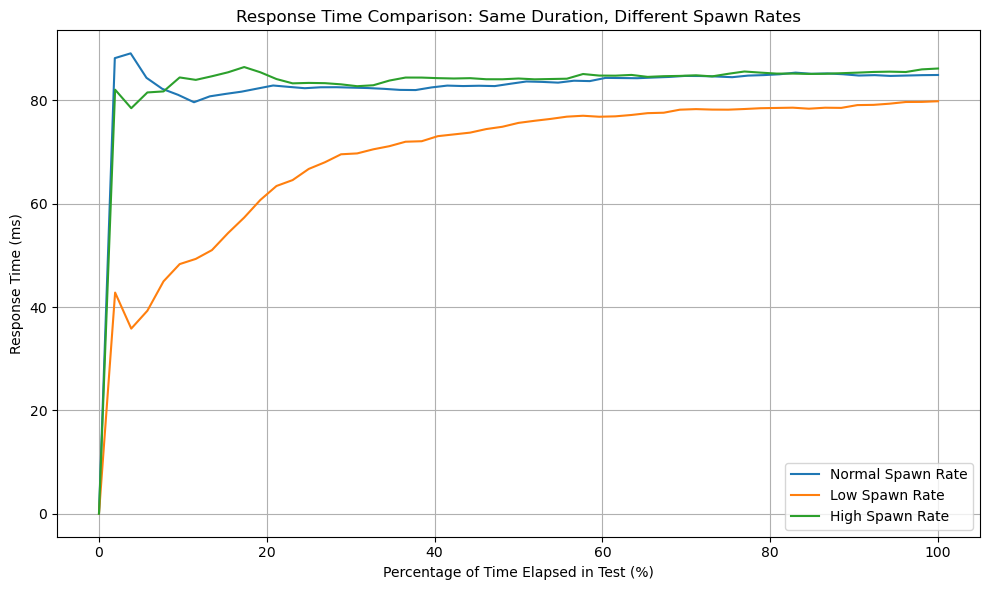

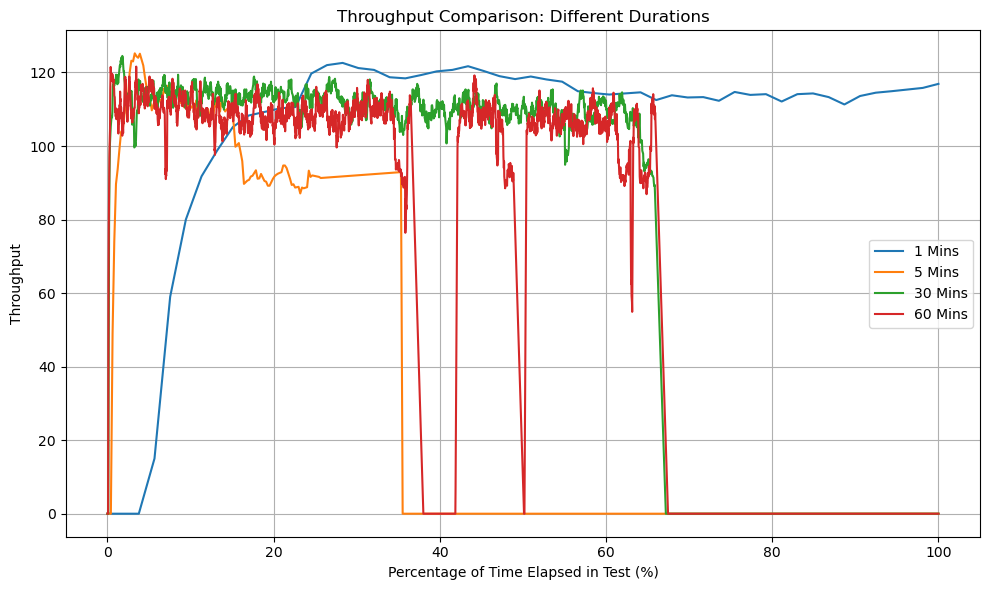

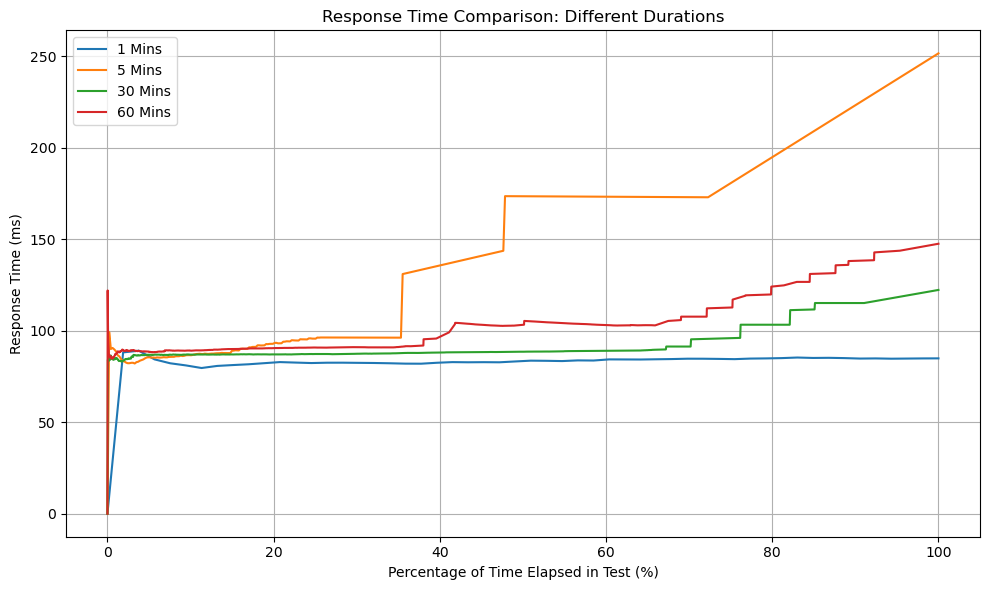

---------------------------------------------------


In [13]:
import matplotlib.pyplot as plt
def plot_data(dfs, labels, y_key, ylabel, title):
    plt.figure(figsize=(10, 6))
    for df, label in zip(dfs, labels):
        # Normalize timestamps to show relative progress (0% to 100%)
        relative_time = (df['Timestamp'] - df['Timestamp'].min()) / (df['Timestamp'].max() - df['Timestamp'].min()) * 100
        plt.plot(relative_time, df[y_key], label=label)
    
    plt.xlabel('Percentage of Time Elapsed in Test (%)')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'{title.replace(" ", "_").lower()}.png')
    plt.show()

print("-------------LowIntensity--------------------------")

# Same duration, different spawn rates
plot_data(
    [data_frames['low']['short'], data_frames['low']['short_low_spawn_rate'], data_frames['low']['short_high_spawn_rate']],
    ['Normal Spawn Rate', 'Low Spawn Rate', 'High Spawn Rate'],
    'Requests/s',
    'Throughput',
    'Throughput Comparison: Same Duration, Different Spawn Rates'
)

plot_data(
    [data_frames['low']['short'], data_frames['low']['short_low_spawn_rate'], data_frames['low']['short_high_spawn_rate']],    
    ['Normal Spawn Rate', 'Low Spawn Rate', 'High Spawn Rate'],
    'Total Average Response Time',
    'Response Time (ms)',
    'Response Time Comparison: Same Duration, Different Spawn Rates'
)

# Different durations
plot_data(
    [data_frames['low']['short'], data_frames['low']['long_5mins'], data_frames['low']['long_30mins'],  data_frames['low']['long_60mins']],    
    ['1 Mins', '5 Mins', '30 Mins', '60 Mins'],
    'Requests/s',
    'Throughput',
    'Throughput Comparison: Different Durations'
)

plot_data(
    [data_frames['low']['short'], data_frames['low']['long_5mins'], data_frames['low']['long_30mins'],  data_frames['low']['long_60mins']],    
    ['1 Mins', '5 Mins', '30 Mins', '60 Mins'],
    'Total Average Response Time',
    'Response Time (ms)',
    'Response Time Comparison: Different Durations'
)

print("---------------------------------------------------")


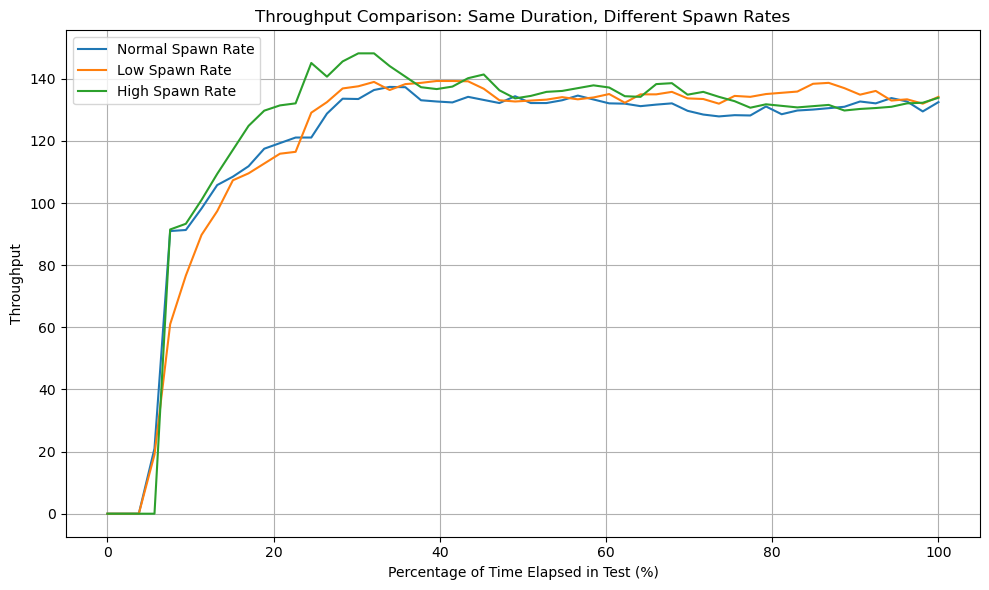

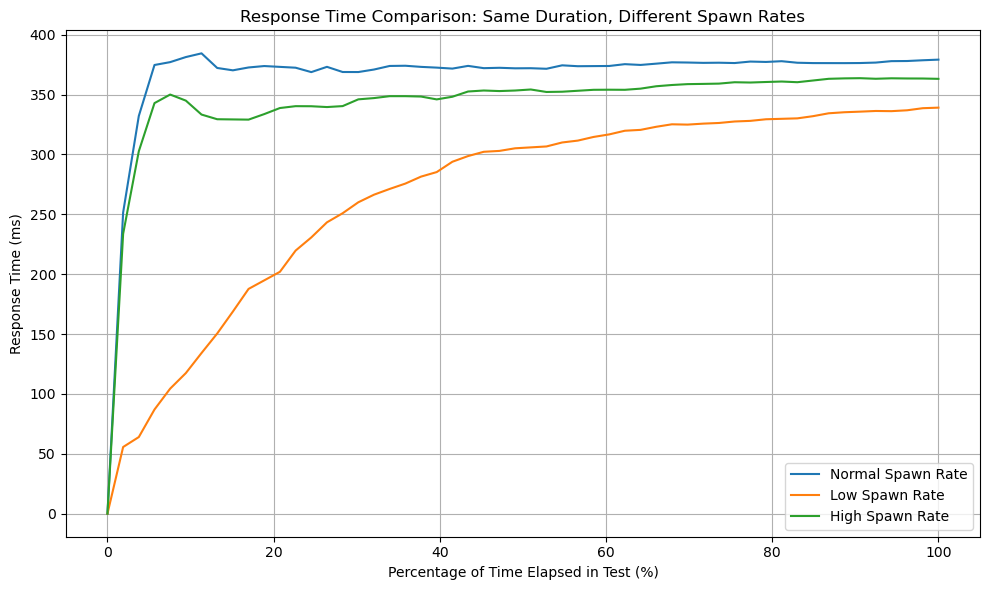

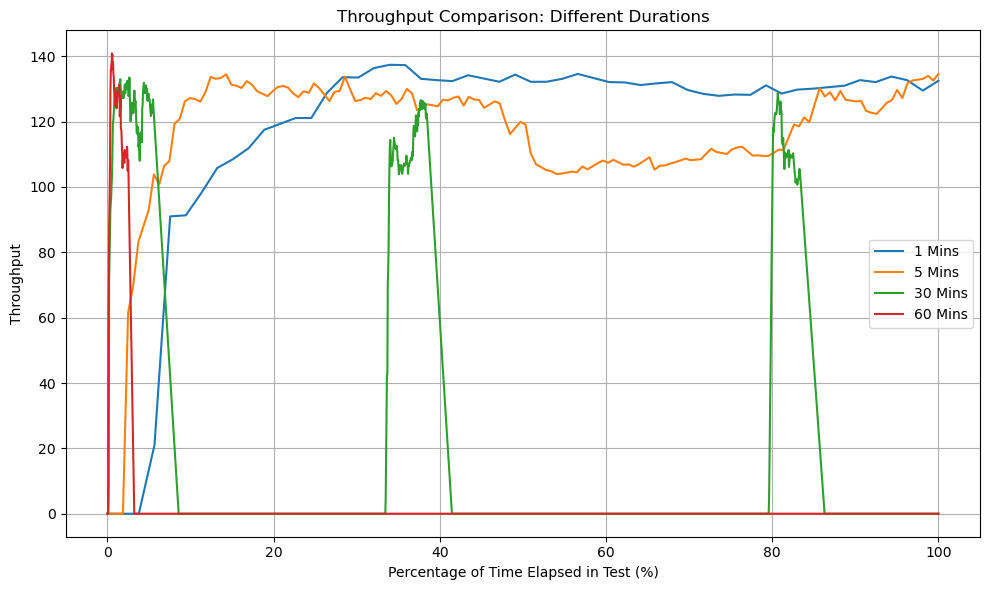

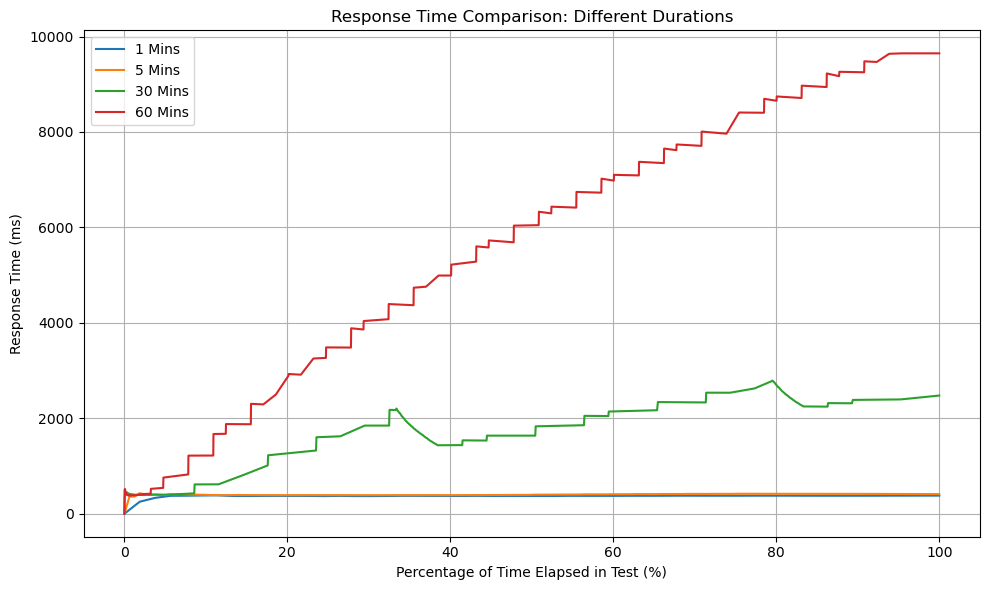

In [14]:
plot_data(
    [data_frames['medium']['short'], data_frames['medium']['short_low_spawn_rate'], data_frames['medium']['short_high_spawn_rate']],
    ['Normal Spawn Rate', 'Low Spawn Rate', 'High Spawn Rate'],
    'Requests/s',
    'Throughput',
    'Throughput Comparison: Same Duration, Different Spawn Rates'
)

plot_data(
    [data_frames['medium']['short'], data_frames['medium']['short_low_spawn_rate'], data_frames['medium']['short_high_spawn_rate']],    
    ['Normal Spawn Rate', 'Low Spawn Rate', 'High Spawn Rate'],
    'Total Average Response Time',
    'Response Time (ms)',
    'Response Time Comparison: Same Duration, Different Spawn Rates'
)

# Different durations
plot_data(
    [data_frames['medium']['short'], data_frames['medium']['long_5mins'], data_frames['medium']['long_30mins'],  data_frames['medium']['long_60mins']],    
    ['1 Mins', '5 Mins', '30 Mins', '60 Mins'],
    'Requests/s',
    'Throughput',
    'Throughput Comparison: Different Durations'
)

plot_data(
    [data_frames['medium']['short'], data_frames['medium']['long_5mins'], data_frames['medium']['long_30mins'],  data_frames['medium']['long_60mins']],    
    ['1 Mins', '5 Mins', '30 Mins', '60 Mins'],
    'Total Average Response Time',
    'Response Time (ms)',
    'Response Time Comparison: Different Durations'
)